Importando bibliotecas e pacotes 

In [1]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
from sklearn import datasets 
import pandas as pd 
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier 

Importando as planilhas de dados 

In [3]:
dadosTreinamento = pd.read_csv("conjunto_de_treinamento.csv.zip")
dadosTeste = pd.read_csv("conjunto_de_teste.csv")
exemploRespostas = pd.read_csv("exemplo_arquivo_respostas.csv")

Transformando em Dataframe 

In [4]:
df_treinamento = pd.DataFrame(dadosTreinamento)
df_teste = pd.DataFrame(dadosTeste)
df_exresp = pd.DataFrame(exemploRespostas)

In [5]:
df_exresp.head()

,id_solicitante,inadimplente
0,20001,0
1,20002,1
2,20003,0
3,20004,1
4,20005,0


In [6]:
df_teste.head()

,id_solicitante,produto_solicitado,dia_vencimento,forma_envio_solicitacao,tipo_endereco,sexo,idade,estado_civil,qtde_dependentes,grau_instrucao,...,estado_onde_trabalha,possui_telefone_trabalho,codigo_area_telefone_trabalho,meses_no_trabalho,profissao,ocupacao,profissao_companheiro,grau_instrucao_companheiro,local_onde_reside,local_onde_trabalha
0,20001,1,25,presencial,1,M,37,2,0,0,...,,N,,0,0.0,0.0,0.0,0.0,384.0,384.0
1,20002,1,10,internet,1,F,31,2,0,0,...,RJ,N,,0,9.0,5.0,NaN,NaN,275.0,275.0
2,20003,1,10,internet,1,F,18,2,0,0,...,RS,N,,0,9.0,2.0,NaN,NaN,948.0,948.0
3,20004,1,10,presencial,1,F,55,2,0,0,...,,N,,0,9.0,1.0,0.0,0.0,581.0,581.0
4,20005,1,10,presencial,1,F,55,1,0,0,...,,N,,0,0.0,1.0,0.0,0.0,573.0,573.0


In [7]:
df_treinamento.head()

,id_solicitante,produto_solicitado,dia_vencimento,forma_envio_solicitacao,tipo_endereco,sexo,idade,estado_civil,qtde_dependentes,grau_instrucao,...,possui_telefone_trabalho,codigo_area_telefone_trabalho,meses_no_trabalho,profissao,ocupacao,profissao_companheiro,grau_instrucao_companheiro,local_onde_reside,local_onde_trabalha,inadimplente
0,1,1,10,presencial,1,M,85,2,0,0,...,N,,0,9.0,1.0,0.0,0.0,600.0,600.0,0
1,2,1,25,internet,1,F,38,1,0,0,...,N,,0,2.0,5.0,NaN,NaN,492.0,492.0,0
2,3,1,20,internet,1,F,37,2,0,0,...,N,,0,NaN,NaN,NaN,NaN,450.0,450.0,1
3,4,1,20,internet,1,M,37,1,1,0,...,Y,54,0,9.0,2.0,NaN,NaN,932.0,932.0,1
4,5,7,1,internet,1,F,51,1,3,0,...,N,,0,9.0,5.0,NaN,NaN,440.0,440.0,1


Tratando dados

In [8]:
df_treinamento.columns

Index(['id_solicitante', 'produto_solicitado', 'dia_vencimento',
       'forma_envio_solicitacao', 'tipo_endereco', 'sexo', 'idade',
       'estado_civil', 'qtde_dependentes', 'grau_instrucao', 'nacionalidade',
       'estado_onde_nasceu', 'estado_onde_reside',
       'possui_telefone_residencial', 'codigo_area_telefone_residencial',
       'tipo_residencia', 'meses_na_residencia', 'possui_telefone_celular',
       'possui_email', 'renda_mensal_regular', 'renda_extra',
       'possui_cartao_visa', 'possui_cartao_mastercard',
       'possui_cartao_diners', 'possui_cartao_amex', 'possui_outros_cartoes',
       'qtde_contas_bancarias', 'qtde_contas_bancarias_especiais',
       'valor_patrimonio_pessoal', 'possui_carro',
       'vinculo_formal_com_empresa', 'estado_onde_trabalha',
       'possui_telefone_trabalho', 'codigo_area_telefone_trabalho',
       'meses_no_trabalho', 'profissao', 'ocupacao', 'profissao_companheiro',
       'grau_instrucao_companheiro', 'local_onde_reside',
       '

Tratando dados de treinamento

In [9]:
deixar_treina = { 'id_solicitante':0,
                'produto_solicitado':1,
                 'dia_vencimento':2,
                 'idade':6,
                'estado_civil':7,
                 'qtde_dependentes':8,
                 'nacionalidade':10,
                 'tipo_residencia':15,
                 'renda_mensal_regular':19, 
                 'renda_extra':20,
                 'possui_cartao_visa':21,
                 'possui_cartao_mastercard':22,
                 'possui_cartao_diners':23, 
                 'possui_cartao_amex':24, 
                 'possui_outros_cartoes':25,
                 'qtde_contas_bancarias':26,
                 'valor_patrimonio_pessoal':28, 
                 'possui_carro':29, 
                 'ocupacao':36, 
                 'local_onde_reside':39,
                 'local_onde_trabalha':40, 
                 'inadimplente':41}
      


In [10]:
indices = []
for i in deixar_treina:
    indices.append(deixar_treina[i])
    
    

In [11]:
df_treinamento = df_treinamento.iloc[:,indices]

In [12]:
df_treinamento.head()

,id_solicitante,produto_solicitado,dia_vencimento,idade,estado_civil,qtde_dependentes,nacionalidade,tipo_residencia,renda_mensal_regular,renda_extra,...,possui_cartao_diners,possui_cartao_amex,possui_outros_cartoes,qtde_contas_bancarias,valor_patrimonio_pessoal,possui_carro,ocupacao,local_onde_reside,local_onde_trabalha,inadimplente
0,1,1,10,85,2,0,1,1.0,480.0,0.0,...,0,0,0,1,0.0,1,1.0,600.0,600.0,0
1,2,1,25,38,1,0,1,1.0,380.0,0.0,...,0,0,0,0,0.0,0,5.0,492.0,492.0,0
2,3,1,20,37,2,0,1,5.0,600.0,0.0,...,0,0,0,0,0.0,0,NaN,450.0,450.0,1
3,4,1,20,37,1,1,1,1.0,460.0,0.0,...,0,0,0,0,0.0,0,2.0,932.0,932.0,1
4,5,7,1,51,1,3,1,0.0,687.0,600.0,...,0,0,0,0,0.0,1,5.0,440.0,440.0,1


contando valores ausentes no conjunto de treinamento

In [13]:
df_treinamento.isnull().sum()

id_solicitante                 0
produto_solicitado             0
dia_vencimento                 0
idade                          0
estado_civil                   0
qtde_dependentes               0
nacionalidade                  0
tipo_residencia              536
renda_mensal_regular           0
renda_extra                    0
possui_cartao_visa             0
possui_cartao_mastercard       0
possui_cartao_diners           0
possui_cartao_amex             0
possui_outros_cartoes          0
qtde_contas_bancarias          0
valor_patrimonio_pessoal       0
possui_carro                   0
ocupacao                    2978
local_onde_reside              0
local_onde_trabalha            0
inadimplente                   0
dtype: int64

Extrair a mediana de tipo_residencia e preencher os valores ausentes com ela

In [26]:
tipo_residencia_mediana = df_treinamento["tipo_residencia"].median()
ocupacao_mediana = df_treinamento["ocupacao"].median()
values = {"tipo_residencia":tipo_residencia_mediana,
         "ocupacao":ocupacao_mediana}

df_treinamento[["tipo_residencia","ocupacao"]]=df_treinamento[["tipo_residencia","ocupacao"]].fillna(value=values)

In [27]:
df_treinamento.isnull().sum()

id_solicitante              0
produto_solicitado          0
dia_vencimento              0
idade                       0
estado_civil                0
qtde_dependentes            0
nacionalidade               0
tipo_residencia             0
renda_mensal_regular        0
renda_extra                 0
possui_cartao_visa          0
possui_cartao_mastercard    0
possui_cartao_diners        0
possui_cartao_amex          0
possui_outros_cartoes       0
qtde_contas_bancarias       0
valor_patrimonio_pessoal    0
possui_carro                0
ocupacao                    0
local_onde_reside           0
local_onde_trabalha         0
inadimplente                0
dtype: int64

Tratando dados de teste

In [16]:
deixar_teste = { 'id_solicitante':0,
                'produto_solicitado':1,
                 'dia_vencimento':2,
                 'idade':6,
                'estado_civil':7,
                 'qtde_dependentes':8,
                 'nacionalidade':10,
                 'tipo_residencia':15,
                 'renda_mensal_regular':19, 
                 'renda_extra':20,
                 'possui_cartao_visa':21,
                 'possui_cartao_mastercard':22,
                 'possui_cartao_diners':23, 
                 'possui_cartao_amex':24, 
                 'possui_outros_cartoes':25,
                 'qtde_contas_bancarias':26,
                 'valor_patrimonio_pessoal':28, 
                 'possui_carro':29, 
                 'ocupacao':36, 
                 'local_onde_reside':39,
                 'local_onde_trabalha':40}

In [17]:
indices_teste = []
for i in deixar_teste:
    indices_teste.append(deixar_teste[i])

In [18]:
df_teste = df_teste.iloc[:,indices_teste]

In [19]:
df_teste.head()

,id_solicitante,produto_solicitado,dia_vencimento,idade,estado_civil,qtde_dependentes,nacionalidade,tipo_residencia,renda_mensal_regular,renda_extra,...,possui_cartao_mastercard,possui_cartao_diners,possui_cartao_amex,possui_outros_cartoes,qtde_contas_bancarias,valor_patrimonio_pessoal,possui_carro,ocupacao,local_onde_reside,local_onde_trabalha
0,20001,1,25,37,2,0,1,1.0,1800.00,0.0,...,0,0,0,0,1,0.0,1,0.0,384.0,384.0
1,20002,1,10,31,2,0,1,1.0,424.88,0.0,...,0,0,0,0,0,0.0,0,5.0,275.0,275.0
2,20003,1,10,18,2,0,1,1.0,400.00,0.0,...,0,0,0,0,0,0.0,0,2.0,948.0,948.0
3,20004,1,10,55,2,0,1,1.0,1400.00,0.0,...,0,0,0,0,1,0.0,1,1.0,581.0,581.0
4,20005,1,10,55,1,0,1,1.0,350.00,0.0,...,0,0,0,0,1,0.0,1,1.0,573.0,573.0


In [20]:
df_teste.isnull().sum()

id_solicitante                0
produto_solicitado            0
dia_vencimento                0
idade                         0
estado_civil                  0
qtde_dependentes              0
nacionalidade                 0
tipo_residencia             125
renda_mensal_regular          0
renda_extra                   0
possui_cartao_visa            0
possui_cartao_mastercard      0
possui_cartao_diners          0
possui_cartao_amex            0
possui_outros_cartoes         0
qtde_contas_bancarias         0
valor_patrimonio_pessoal      0
possui_carro                  0
ocupacao                    690
local_onde_reside             0
local_onde_trabalha           0
dtype: int64

In [28]:
tipo_residencia_mediana_teste = df_teste["tipo_residencia"].median()
ocupacao_mediana_teste = df_teste["ocupacao"].median()
values_teste = {"tipo_residencia":tipo_residencia_mediana_teste,
         "ocupacao":ocupacao_mediana_teste}

df_teste[["tipo_residencia","ocupacao"]] = df_teste[["tipo_residencia","ocupacao"]].fillna(value=values_teste)

In [29]:
df_teste.isnull().sum()

id_solicitante              0
produto_solicitado          0
dia_vencimento              0
idade                       0
estado_civil                0
qtde_dependentes            0
nacionalidade               0
tipo_residencia             0
renda_mensal_regular        0
renda_extra                 0
possui_cartao_visa          0
possui_cartao_mastercard    0
possui_cartao_diners        0
possui_cartao_amex          0
possui_outros_cartoes       0
qtde_contas_bancarias       0
valor_patrimonio_pessoal    0
possui_carro                0
ocupacao                    0
local_onde_reside           0
local_onde_trabalha         0
dtype: int64

Plotando gráficos 


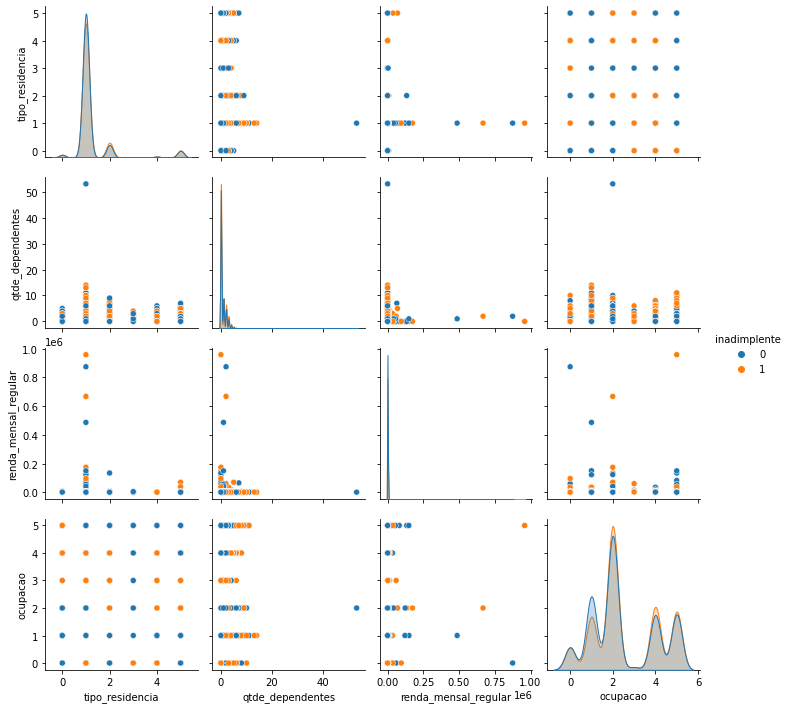

In [23]:
g = sns.pairplot(df_treinamento[["tipo_residencia","qtde_dependentes","renda_mensal_regular","ocupacao","inadimplente"]],hue="inadimplente")

testando SVM

In [30]:
x_treino = df_treinamento.iloc[:,0:21]
y_treino = df_treinamento["inadimplente"]
x_teste = df_teste 

In [34]:
clf = RandomForestClassifier(n_estimators = 100)


RandomForestClassifier()

In [35]:
clf.fit(x_treino,y_treino)

RandomForestClassifier()

In [79]:
pred = clf.predict(x_teste)
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [80]:
s = y_teste.values
count = 0 

In [81]:
for i in range(len(pred)):
    if pred[i] == s[i]:
        count+=1

In [82]:
count

2520

In [83]:
b = len(pred)

In [84]:
count/b

0.504

In [89]:
df_exresp.head()

,id_solicitante,inadimplente
0,20001,0
1,20002,1
2,20003,0
3,20004,1
4,20005,0


In [90]:
df_predicao = pd.DataFrame({"id_solicitante":x_teste["id_solicitante"],
                              "inadimplente":pred})

In [92]:
csv = df_predicao.to_csv("predicao",index=False)